In [33]:
import pandas as pd
import numpy as np

In [34]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']
df = pd.read_csv(r'C:\Users\Daniela\Desktop\Data Files\imports-85.data', names=cols)

In [35]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [36]:
pd.set_option('display.max_columns', None)

In [37]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [38]:
# Identify numeric columuns we can use for regression analysis
numeric_columns = ['normalized-losses','wheel-base','length','width','height','curb-weight',
                   'engine-size','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg',
                   'highway-mpg','price']
car_data = df[numeric_columns]

In [39]:
car_data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [40]:
# Inspect the data types and look for null values
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak-rpm           205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


## Data cleaning and preparation

In [41]:
# Replace question mark strings with np.nan values
car_data.replace('?', np.nan, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [42]:
# Cast object columns to floats
car_data = car_data.astype(float)

In [43]:
# Inspect data types again
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [44]:
car_data[car_data['normalized-losses'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
14,NaN,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0


There are a few rows where we don't have price data and since that is our target variable we can drop these rows.

In [45]:
car_data.drop(car_data[car_data['price'].isnull()].index, inplace=True)

We still need to figure out what to do with the null values in the normalized losses column. Since the data set is quite small it would be prefereable to not lose this data. We will use the average value instead and hope it doesn't affect the feature's performance too much.

In [46]:
car_data['normalized-losses'] = car_data['normalized-losses'].replace(np.nan,car_data['normalized-losses'].mean())

In [47]:
# Find remaining null values
car_data.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [48]:
# Both bore and stroke columns have null values on the same 4 rows
car_data[car_data['bore'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,10945.0
56,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,11845.0
57,150.0,95.3,169.0,65.7,49.6,2385.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,13645.0
58,150.0,95.3,169.0,65.7,49.6,2500.0,80.0,NaN,NaN,9.4,135.0,6000.0,16.0,23.0,15645.0


In [49]:
car_data['stroke'].describe()

count    197.000000
mean       3.256904
std        0.319256
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [50]:
car_data['bore'].describe()

count    197.000000
mean       3.330711
std        0.270793
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

Let's replace these values with the mean value for each row

In [51]:
car_data['bore'].replace(np.nan,car_data['bore'].mean(), inplace=True)
car_data['stroke'].replace(np.nan,car_data['stroke'].mean(), inplace=True)

In [52]:
car_data[car_data['horsepower'].isnull()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,122.0,96.1,181.5,66.5,55.2,2579.0,132.0,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9295.0
131,122.0,96.1,176.8,66.6,50.5,2460.0,132.0,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9895.0


In [53]:
car_data['horsepower'].describe()

count    199.000000
mean     103.396985
std       37.553843
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

In [54]:
# The standard deviation is considerably higher than the bore and stroke columns. Since it's only two rows we'll opt
# to drop the rows instead.
car_data.drop(index=[130,131], inplace=True)

In [55]:
# Reset the index
car_data.reset_index(drop=True,inplace=True)

In [56]:
# Normalize data and randomize the data
car_data_noprice = car_data.drop('price', axis=1)
car_data_normalized = ((car_data_noprice - car_data_noprice.min()) / (car_data_noprice.max() - car_data_noprice.min()))
car_data_normalized['price'] = car_data['price']
rand_index = np.random.permutation(car_data_normalized.index)
shuffled_car_data = car_data_normalized.reindex(rand_index)

## Modelling
Let's start with a simple KNN model and to get a feel for the features we'll run a series of univariate regressions to compare each feature. Using an 80/20 test/train split, we'll train a model on a feature using the default k value of 5 and then compare the root mean square error scores.

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature, target, df):
    # Split the data into an 80/20 split
    train_index = int(len(df) * .8)
    train_split = df.iloc[:train_index]
    test_split = df.iloc[train_index:]
    
    # Instantiate the regressor using the default K of 5
    knn = KNeighborsRegressor()
    knn.fit(train_split[[feature]], train_split[[target]])
    prediction = knn.predict(test_split[[feature]])
    
    # Calculate and return the RMSE and MSE values
    mse = mean_squared_error(test_split[[target]], prediction)
    rmse = mean_squared_error(test_split[[target]], prediction, squared=False)
    
    return rmse, mse

In [58]:
# Collect scores in respective dictionaries
mse_scores = {}
rmse_scores = {}

for col in car_data.columns:
    if col == 'price':
        break
    rmse, mse = knn_train_test(col,'price',car_data)
    mse_scores[col] = mse
    rmse_scores[col] = rmse

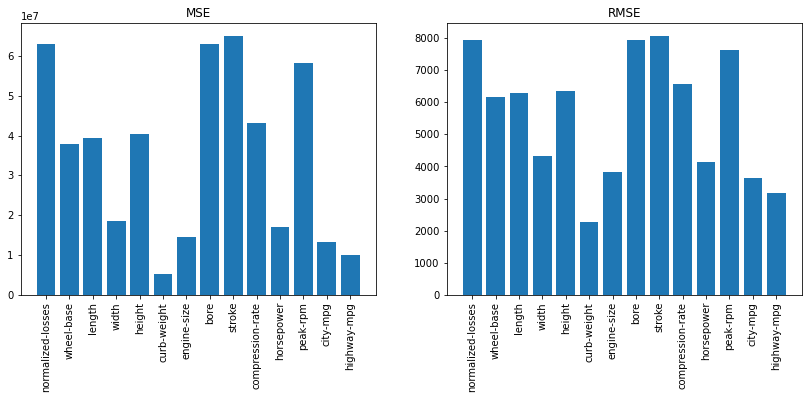

In [59]:
# Graph the mse and rmse scores

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,5))

ax1 = fig.add_subplot(121)
ax1.bar(mse_scores.keys(),mse_scores.values())
plt.xticks(rotation='vertical')
plt.title('MSE')

ax2 = fig.add_subplot(122)
ax2.bar(rmse_scores.keys(),rmse_scores.values())
plt.xticks(rotation='vertical')
plt.title('RMSE')

plt.show();

It looks like 'curb-weight' gives us the best RMSE. Let's try the same exercise again with varying K values. We'll update the function to accept K values.

In [60]:
# Update function to take a K parameter
def knn_train_test(feature, target, k, df):
    # Split the data into an 80/20 split
    train_index = int(len(df) * .8)
    train_split = df.iloc[:train_index]
    test_split = df.iloc[train_index:]
    
    # Instantiate the regressor using the default K of 5
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_split[[feature]], train_split[[target]])
    prediction = knn.predict(test_split[[feature]])
    
    # Calculate and return the RMSE value
    rmse = mean_squared_error(test_split[[target]], prediction, squared=False)
    
    return rmse

k_values = [1,3,5,7,9]
one = {}
three = {}
five = {}
seven = {}
nine = {}
feature_performance = {}
features = list(shuffled_car_data.columns)
features.remove('price')

for feature in features:
    feature_performance[feature] = {key:0 for key in k_values}
    for k in k_values:
        feature_performance[feature][k] = knn_train_test(feature,'price',k,shuffled_car_data)

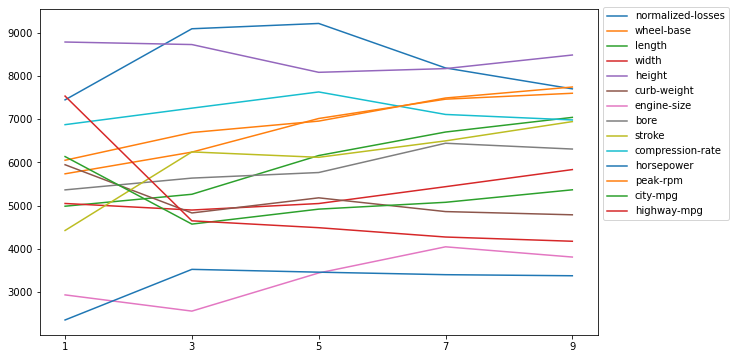

In [61]:
# Let's plot the scores to see which k value performed best
feature_df = pd.DataFrame(feature_performance)
feature_df.plot(figsize=(10,6))
plt.xticks([1,3,5,7,9])
plt.legend(bbox_to_anchor=(1.0,1.02),loc='upper left')

In [63]:
feature_df

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,7451.200303,5737.275148,4986.201470,5049.501614,8791.866150,5947.638538,2931.039321,5364.836594,4423.659110,6876.524856,2349.430468,6051.556066,6137.009956,7538.896028
3,9099.191380,6239.956722,5262.938098,4897.682337,8733.132586,4829.997229,2554.923736,5637.809028,6244.526715,7258.921972,3522.502225,6694.002052,4571.678980,4647.379797
5,9221.857301,7019.307194,6160.662406,5048.493751,8089.501676,5180.554546,3438.838185,5766.967500,6119.692998,7634.600437,3457.421506,6958.839586,4918.333267,4488.109688
7,8190.718603,7467.109112,6705.581417,5438.936191,8175.626210,4861.725185,4045.155410,6445.623226,6500.573659,7112.928793,3399.083326,7494.307118,5076.803465,4272.164699
9,7706.259444,7604.188626,7045.141212,5835.016873,8490.650513,4787.031193,3807.892927,6311.105831,6947.323537,6985.606406,3374.442564,7748.903438,5366.524937,4173.862065


### Multivariate model
After getting a feel for the features with the univariate models, let's try combining the features. We'll start by updating the function to accept multiple features. Starting at a k value of 5, we'll run different combinations of features.

In [64]:
# Update function to take a list of features
def knn_train_test(feature, target, k, df):
    # Split the data into an 80/20 split
    train_index = int(len(df) * .8)
    train_split = df.iloc[:train_index]
    test_split = df.iloc[train_index:]
    
    # Instantiate the regressor using the default K of 5
    knn = KNeighborsRegressor(n_neighbors=k)
    
    if type(feature) != list:
        knn.fit(train_split[[feature]], train_split[target])
        prediction = knn.predict(test_split[feature])
    else:
        knn.fit(train_split[feature], train_split[target])
        prediction = knn.predict(test_split[feature])
    
    # Calculate and return the RMSE value
    rmse = mean_squared_error(test_split[[target]], prediction, squared=False)
    
    return rmse

In [83]:
# We'll start at a k of 5 so let's sort the values for easy retrieval
feature_df.loc[5].sort_values()

engine-size          3438.838185
horsepower           3457.421506
highway-mpg          4488.109688
city-mpg             4918.333267
width                5048.493751
curb-weight          5180.554546
bore                 5766.967500
stroke               6119.692998
length               6160.662406
peak-rpm             6958.839586
wheel-base           7019.307194
compression-rate     7634.600437
height               8089.501676
normalized-losses    9221.857301
Name: 5, dtype: float64

In [84]:
# Let's first try with all the columns, then with the features that gave us their best results when we ran our univariate
# models.
multivariate_rmse_scores = {}
multivariate_rmse_scores['all_features_rmse'] = knn_train_test(features,'price',5,shuffled_car_data)
multivariate_rmse_scores['best_score'] = knn_train_test(['engine-size'],'price',5,shuffled_car_data)
multivariate_rmse_scores['best_two_scores'] = knn_train_test(['engine-size','horsepower'],'price',5,shuffled_car_data)
multivariate_rmse_scores['best_three_scores'] = knn_train_test(['engine-size','horsepower','highway-mpg'],'price',5,shuffled_car_data)
multivariate_rmse_scores['best_four_scores'] = knn_train_test(['engine-size','horsepower','highway-mpg','city-mpg'],'price',5,shuffled_car_data)
multivariate_rmse_scores['best_five_scores'] = knn_train_test(['engine-size','horsepower','highway-mpg','city-mpg','width'],'price',5,shuffled_car_data)

In [85]:
multivariate_rmse_scores

{'all_features_rmse': 4707.317881447991,
 'best_score': 3438.83818505611,
 'best_two_scores': 2273.0226529887464,
 'best_three_scores': 2408.7860922049513,
 'best_four_scores': 2230.2236959551838,
 'best_five_scores': 2742.047536057681}

Now let's take our top 3 multivariate models and compare them using different k values.

In [88]:
variable_k_rmse = {'two_features':{},'three_features':{},'four_features':{},'five_features':{},'all_features':{}}
for k in range(1,26):
    variable_k_rmse['two_features'][k] = knn_train_test(['engine-size','horsepower'],'price',k,shuffled_car_data)
    variable_k_rmse['three_features'][k] = knn_train_test(['engine-size','horsepower','highway-mpg'],'price',k,shuffled_car_data)
    variable_k_rmse['four_features'][k] = knn_train_test(['engine-size','horsepower','highway-mpg','city-mpg'],'price',k,shuffled_car_data)
    variable_k_rmse['five_features'][k] = knn_train_test(['engine-size','horsepower','highway-mpg','city-mpg','width'],'price',k,shuffled_car_data)
    variable_k_rmse['all_features'][k] = knn_train_test(features,'price',k,shuffled_car_data)

Text(0, 0.5, 'RMSE')

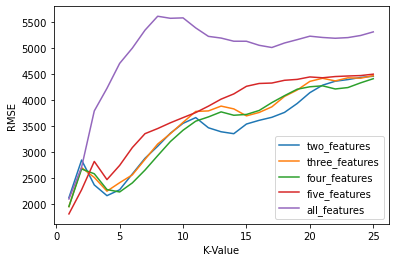

In [90]:
# Create a dataframe and plot the rmse scores
k_rmse_df = pd.DataFrame(variable_k_rmse)
k_rmse_df.plot()
plt.xlabel('K-Value')
plt.ylabel('RMSE')

It looks like two features at a k value of 4 performs best overall (RMSE of 2159). One thing we haven't done yet is try to change the train/test split. So far we have used an 80/20 split but let's try a few different combinations on our best multivariate model. Let's modify the code to give us to enter a train split as an argument and use a k of 4.

In [118]:
# Update function to take in an argument, s, which will be less than 1 and be used to split the train set.
def knn_train_test(feature, target, s, df):
    # Split the data into an 80/20 split
    train_index = int(len(df) * s)
    train_split = df.iloc[:train_index]
    test_split = df.iloc[train_index:]
    
    # Instantiate the regressor using a k of 4
    knn = KNeighborsRegressor(n_neighbors=4)
    knn.fit(train_split[feature], train_split[target])
    prediction = knn.predict(test_split[feature])
    
    # Calculate and return the RMSE value
    rmse = mean_squared_error(test_split[[target]], prediction, squared=False)
    
    return rmse

train_split = {x:0 for x in ['two_features','three_features','four_features']}

for x in train_split:
    train_split[x] = {s:0 for s in [0.5,0.6,0.7,0.8]}
    
for s in [0.5,0.6,0.7,0.8]:
    train_split['two_features'][s] = knn_train_test(['engine-size','horsepower'],'price',s,shuffled_car_data)
    train_split['three_features'][s] = knn_train_test(['engine-size','horsepower','highway-mpg'],'price',s,shuffled_car_data)
    train_split['four_features'][s] = knn_train_test(['engine-size','horsepower','highway-mpg','city-mpg'],'price',s,shuffled_car_data)

In [119]:
# Unsurprisingly, RMSE increases as we reduce the size of the train split.
train_split

{'two_features': {0.5: 3382.6665931813322,
  0.6: 3055.4792830616198,
  0.7: 2879.8266073744207,
  0.8: 2159.340601752072},
 'three_features': {0.5: 3111.8060311698414,
  0.6: 2850.131352236244,
  0.7: 2617.910550618884,
  0.8: 2246.325009529454},
 'four_features': {0.5: 3011.570945121499,
  0.6: 2742.2406568921883,
  0.7: 2526.3914359219953,
  0.8: 2277.182081268426}}

In [139]:
# Let's try a 50/50 split using cross-validation and take the average between the two RMSE scores
# Update function to take only 3 arguments and return an average RMSE using cross-validation
def knn_train_test(feature, target, df):
    # Split the data into a 50/50 split
    train_index = int(len(df) * 0.5)
    train_split_one = df.iloc[:train_index]
    test_split_one = df.iloc[train_index:]
    train_split_two = df.iloc[train_index:]
    test_split_two = df.iloc[:train_index]
    
    # Instantiate the regressor using a k of 4
    knn = KNeighborsRegressor(n_neighbors=4)
    knn.fit(train_split_one[feature], train_split_one[target])
    prediction_one = knn.predict(test_split_one[feature]) 
    first_rmse = mean_squared_error(test_split_one[[target]], prediction_one, squared=False)
    knn = KNeighborsRegressor(n_neighbors=4)
    knn.fit(train_split_two[feature], train_split_two[target])
    prediction_two = knn.predict(test_split_two[feature]) 
    second_rmse = mean_squared_error(test_split_two[[target]], prediction_two, squared=False)
    
    return np.mean([first_rmse,second_rmse])

In [140]:
two_features = knn_train_test(['engine-size','horsepower'],'price',shuffled_car_data)
three_features = knn_train_test(['engine-size','horsepower','highway-mpg'],'price',shuffled_car_data)
four_features = knn_train_test(['engine-size','horsepower','highway-mpg','city-mpg'],'price',shuffled_car_data)
print('two features :',two_features)
print('three features :',three_features)
print('four features :',four_features)

two features : 3501.138934009664
three features : 3326.1749173165745
four features : 3318.4375140329353
